In [121]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img, img_to_array
import tensorflow_datasets as tfds
import os
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
train_datagen = ImageDataGenerator(rescale = 1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True )

training_Set = train_datagen.flow_from_directory("dataimg/train",target_size=(160,160),batch_size=16,class_mode = 'categorical') 

Found 8478 images belonging to 150 classes.


In [124]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_Set = test_datagen.flow_from_directory(
        'dataimg/val',
        target_size=(160, 160),
        batch_size=32,
        class_mode='categorical')

Found 2190 images belonging to 150 classes.


In [125]:
base_model = tf.keras.applications.xception.Xception(weights = "imagenet", include_top = False)

In [126]:
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(150,activation = "softmax")(avg)
model = tf.keras.Model(inputs = base_model.input,outputs = output)
for layer in base_model.layers:
    layer.trainable = False


In [127]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9,name='SGD')
model.compile(loss = 'categorical_crossentropy',optimizer=optimizer,metrics=["accuracy"])
hist = model.fit(training_Set,epochs = 15,validation_data= test_Set)

Epoch 1/15
185/530 [=========>....................] - ETA: 14:42 - loss: 5.1298 - accuracy: 0.062 - ETA: 1:29 - loss: 5.1408 - accuracy: 0.031 - ETA: 2:05 - loss: 5.1504 - accuracy: 0.02 - ETA: 1:47 - loss: 5.1688 - accuracy: 0.01 - ETA: 2:08 - loss: 5.1503 - accuracy: 0.01 - ETA: 2:06 - loss: 5.1518 - accuracy: 0.01 - ETA: 1:58 - loss: 5.1474 - accuracy: 0.01 - ETA: 1:51 - loss: 5.1619 - accuracy: 0.01 - ETA: 1:46 - loss: 5.1651 - accuracy: 0.02 - ETA: 1:42 - loss: 5.1739 - accuracy: 0.01 - ETA: 1:43 - loss: 5.1563 - accuracy: 0.02 - ETA: 1:42 - loss: 5.1702 - accuracy: 0.02 - ETA: 1:40 - loss: 5.1500 - accuracy: 0.02 - ETA: 1:37 - loss: 5.1338 - accuracy: 0.02 - ETA: 1:35 - loss: 5.1197 - accuracy: 0.02 - ETA: 1:33 - loss: 5.1038 - accuracy: 0.02 - ETA: 1:32 - loss: 5.0670 - accuracy: 0.03 - ETA: 1:31 - loss: 5.0378 - accuracy: 0.03 - ETA: 1:32 - loss: 5.0347 - accuracy: 0.03 - ETA: 1:33 - loss: 5.0117 - accuracy: 0.03 - ETA: 1:32 - loss: 4.9911 - accuracy: 0.03 - ETA: 1:31 - loss: 4

In [128]:
for layer in base_model.layers:
    layer.trainable = True
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,name='SGD')
model.compile(loss = 'categorical_crossentropy',optimizer=optimizer,metrics=["accuracy"])
hist = model.fit(training_Set,epochs = 15,validation_data= test_Set)

Epoch 1/15
185/530 [=========>....................] - ETA: 23:46 - loss: 3.5036 - accuracy: 0.187 - ETA: 1:40 - loss: 3.3955 - accuracy: 0.218 - ETA: 1:30 - loss: 3.4746 - accuracy: 0.22 - ETA: 1:31 - loss: 3.3387 - accuracy: 0.26 - ETA: 1:33 - loss: 3.3688 - accuracy: 0.26 - ETA: 1:30 - loss: 3.4430 - accuracy: 0.25 - ETA: 1:33 - loss: 3.4019 - accuracy: 0.25 - ETA: 1:35 - loss: 3.3894 - accuracy: 0.25 - ETA: 1:38 - loss: 3.3260 - accuracy: 0.28 - ETA: 1:36 - loss: 3.2299 - accuracy: 0.32 - ETA: 1:34 - loss: 3.2362 - accuracy: 0.32 - ETA: 1:33 - loss: 3.2641 - accuracy: 0.31 - ETA: 1:32 - loss: 3.2455 - accuracy: 0.31 - ETA: 1:36 - loss: 3.2401 - accuracy: 0.31 - ETA: 1:35 - loss: 3.2068 - accuracy: 0.32 - ETA: 1:33 - loss: 3.1767 - accuracy: 0.33 - ETA: 1:33 - loss: 3.1684 - accuracy: 0.34 - ETA: 1:32 - loss: 3.1434 - accuracy: 0.34 - ETA: 1:32 - loss: 3.1222 - accuracy: 0.34 - ETA: 1:31 - loss: 3.1345 - accuracy: 0.33 - ETA: 1:32 - loss: 3.1001 - accuracy: 0.34 - ETA: 1:31 - loss: 3

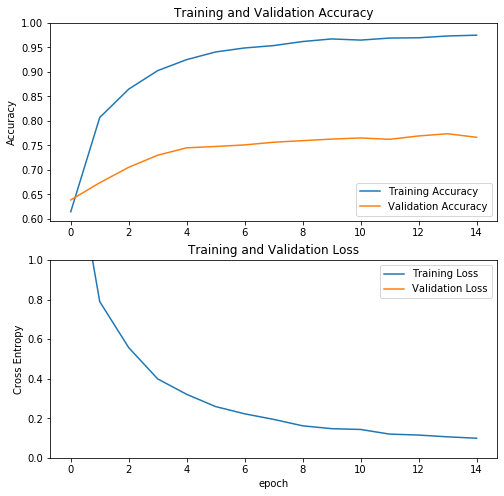

In [129]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [133]:
PATH = 'dataimg/train'
PATH1 = 'test_set'
classes = os.listdir(PATH)
class1 = os.listdir(PATH1)

In [134]:
test_datagen1 = ImageDataGenerator(rescale=1./255)
test_Set1 = test_datagen1.flow_from_directory(
        'test_set',
        target_size=(160, 160),
        batch_size=16,
        class_mode='categorical')

Found 9 images belonging to 4 classes.


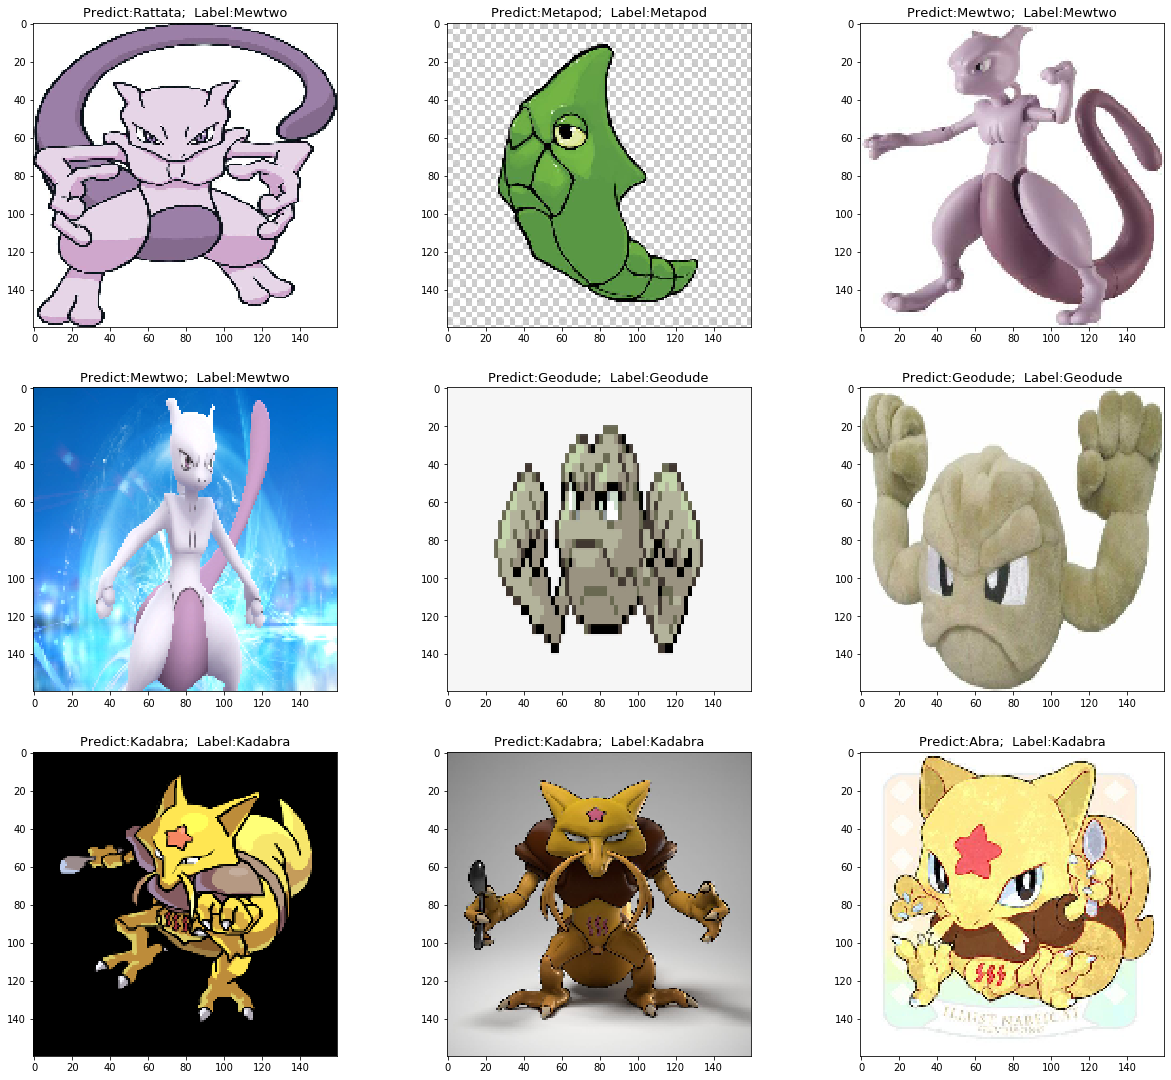

In [136]:
plt.figure(figsize=(21,19))
t_x,t_y = next(test_Set1) 
pred_ = model.predict(t_x)
for i in range(len(t_x)):
    pred,y = pred_[i].argmax(), t_y[i].argmax()
    plt.subplot(3,3,i+1)
    plt.imshow(t_x[i])
    title_ = 'Predict:' + str(classes[pred])+ ';  Label:' + str(class1[y])
    plt.title(title_,size = 13)
plt.show()

In [137]:
model.save("xcepPoke.h5")

E:\Anaconda3\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
